# Problem statement: Is Vaccinated or Not

### Step1:Import the packages
### numpy,pandas,matplotlib,seaborn,sklearn,train test split,metrics

In [1]:
#Basic and most important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Data processing functions   
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
#Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#Model evaluation tools
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## Step2: Load the dataset

In [2]:
df = pd.read_csv("C:/Users/Admin/Desktop/h1n1_vaccine_prediction.csv")

## Step3: Data Analysis
## a. Understanding the dataset
- Head of the dataset
- Shape of the data set
- Types of columns
- Information about data set
- Summary of the data set

In [3]:
df.head(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,5.0,2.0,1.0,5.0,4.0,4.0,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",2.0,3.0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,55 - 64 Years,< 12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,2.0,0.0,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,45 - 54 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,55 - 64 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0


In [4]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [5]:
df.shape

(26707, 34)

In [6]:
df.dtypes.value_counts()

float64    23
object      9
int64       2
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [8]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [9]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
unique_id,26707.0,NaN,NaN,NaN,13353.0,7709.791156,0.0,6676.5,13353.0,20029.5,26706.0
h1n1_worry,26615.0,NaN,NaN,NaN,1.618486,0.910311,0.0,1.0,2.0,2.0,3.0
h1n1_awareness,26591.0,NaN,NaN,NaN,1.262532,0.618149,0.0,1.0,1.0,2.0,2.0
antiviral_medication,26636.0,NaN,NaN,NaN,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
contact_avoidance,26499.0,NaN,NaN,NaN,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
bought_face_mask,26688.0,NaN,NaN,NaN,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
wash_hands_frequently,26665.0,NaN,NaN,NaN,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
avoid_large_gatherings,26620.0,NaN,NaN,NaN,0.35864,0.47961,0.0,0.0,0.0,1.0,1.0
reduced_outside_home_cont,26625.0,NaN,NaN,NaN,0.337315,0.472802,0.0,0.0,0.0,1.0,1.0
avoid_touch_face,26579.0,NaN,NaN,NaN,0.677264,0.467531,0.0,0.0,1.0,1.0,1.0


## 4.Data Cleaning
#### should check if the dataset has any missing values
#### check if there are any duplicate values, if so drop it
#### should replace '0' with the respective attribute mean value

In [10]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [11]:
duplicate = df.duplicated()

In [12]:
duplicate.sum()

0

In [13]:
df.drop(['unique_id','qualification','race','sex','income_level','marital_status','housing_status','employment','has_health_insur'],axis=1,inplace=True)

In [14]:
df.isnull().sum()

h1n1_worry                     92
h1n1_awareness                116
antiviral_medication           71
contact_avoidance             208
bought_face_mask               19
wash_hands_frequently          42
avoid_large_gatherings         87
reduced_outside_home_cont      82
avoid_touch_face              128
dr_recc_h1n1_vacc            2160
dr_recc_seasonal_vacc        2160
chronic_medic_condition       971
cont_child_undr_6_mnths       820
is_health_worker              804
is_h1n1_vacc_effective        391
is_h1n1_risky                 388
sick_from_h1n1_vacc           395
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc           537
age_bracket                     0
census_msa                      0
no_of_adults                  249
no_of_children                249
h1n1_vaccine                    0
dtype: int64

In [15]:
print(df['h1n1_worry'].unique())
print(df['h1n1_awareness'].unique())
print(df['antiviral_medication'].unique())
print(df['contact_avoidance'].unique())
print(df['bought_face_mask'].unique())
print(df['wash_hands_frequently'].unique())
print(df['avoid_large_gatherings'].unique())
print(df['reduced_outside_home_cont'].unique())
print(df['avoid_touch_face'].unique())
print(df['dr_recc_h1n1_vacc'].unique())
print(df['dr_recc_seasonal_vacc'].unique())
print(df['chronic_medic_condition'].unique())
print(df['cont_child_undr_6_mnths'].unique())
print(df['is_health_worker'].unique())
print(df['is_h1n1_vacc_effective'].unique())
print(df['is_h1n1_risky'].unique())
print(df['sick_from_h1n1_vacc'].unique())
print(df['no_of_adults'].unique())
print(df['no_of_children'].unique())
print(df['h1n1_vaccine'].unique())

[ 1.  3.  2.  0. nan]
[ 0.  2.  1. nan]
[ 0.  1. nan]
[ 0.  1. nan]
[ 0.  1. nan]
[ 0.  1. nan]
[ 0.  1. nan]
[ 1.  0. nan]
[ 1.  0. nan]
[ 0. nan  1.]
[ 0. nan  1.]
[ 0.  1. nan]
[ 0.  1. nan]
[ 0.  1. nan]
[ 3.  5.  4.  2.  1. nan]
[ 1.  4.  3.  2.  5. nan]
[ 2.  4.  1.  5.  3. nan]
[ 0.  2.  1.  3. nan]
[ 0.  3.  2.  1. nan]
[0 1]


In [16]:
median1=df['h1n1_worry'].median()
df['h1n1_worry'].replace(np.nan,median1,inplace=True)
median2=df['h1n1_awareness'].median()
df['h1n1_awareness'].replace(np.nan,median2,inplace=True)
median3=df['antiviral_medication'].median()
df['antiviral_medication'].replace(np.nan,median3,inplace=True)
median4=df['contact_avoidance'].median()
df['contact_avoidance'].replace(np.nan,median4,inplace=True)
median5=df['bought_face_mask'].median()
df['bought_face_mask'].replace(np.nan,median5,inplace=True)
median6=df['wash_hands_frequently'].median()
df['wash_hands_frequently'].replace(np.nan,median6,inplace=True)
median7=df['avoid_large_gatherings'].median()
df['avoid_large_gatherings'].replace(np.nan,median7,inplace=True)
median8=df['reduced_outside_home_cont'].median()
df['reduced_outside_home_cont'].replace(np.nan,median8,inplace=True)
median9=df['avoid_touch_face'].median()
df['avoid_touch_face'].replace(np.nan,median9,inplace=True)
median10=df['dr_recc_h1n1_vacc'].median()
df['dr_recc_h1n1_vacc'].replace(np.nan,median10,inplace=True)
median11=df['dr_recc_seasonal_vacc'].median()
df['dr_recc_seasonal_vacc'].replace(np.nan,median11,inplace=True)
median12=df['chronic_medic_condition'].median()
df['chronic_medic_condition'].replace(np.nan,median12,inplace=True)
median13=df['cont_child_undr_6_mnths'].median()
df['cont_child_undr_6_mnths'].replace(np.nan,median13,inplace=True)
median14=df['is_h1n1_vacc_effective'].median()
df['is_h1n1_vacc_effective'].replace(np.nan,median14,inplace=True)
median15=df['is_h1n1_risky'].median()
df['is_h1n1_risky'].replace(np.nan,median15,inplace=True)
median16=df['sick_from_h1n1_vacc'].median()
df['sick_from_h1n1_vacc'].replace(np.nan,median16,inplace=True)
median17=df['is_health_worker'].median()
df['is_health_worker'].replace(np.nan,median17,inplace=True)
median18=df['is_seas_vacc_effective'].median()
df['is_seas_vacc_effective'].replace(np.nan,median18,inplace=True)
median19=df['is_seas_risky'].median()
df['is_seas_risky'].replace(np.nan,median19,inplace=True)
median20=df['sick_from_seas_vacc'].median()
df['sick_from_seas_vacc'].replace(np.nan,median20,inplace=True)
median21=df['no_of_adults'].median()
df['no_of_adults'].replace(np.nan,median21,inplace=True)
median22=df['no_of_children'].median()
df['no_of_children'].replace(np.nan,median22,inplace=True)

In [17]:
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: int64

In [18]:
df.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
census_msa                    object
no_of_adults                 float64
no_of_children               float64
h1n1_vaccine                   int64
dtype: object

## Step5: Data Visulization

<Axes: xlabel='h1n1_vaccine', ylabel='count'>

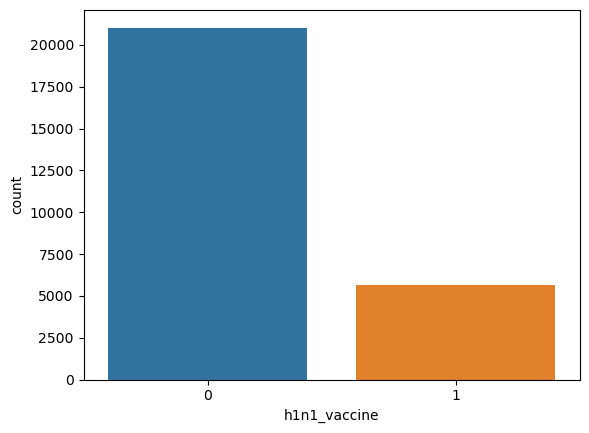

In [19]:
sns.countplot(x='h1n1_vaccine',data=df)

array([[<Axes: title={'center': 'h1n1_worry'}>,
        <Axes: title={'center': 'h1n1_awareness'}>,
        <Axes: title={'center': 'antiviral_medication'}>,
        <Axes: title={'center': 'contact_avoidance'}>,
        <Axes: title={'center': 'bought_face_mask'}>],
       [<Axes: title={'center': 'wash_hands_frequently'}>,
        <Axes: title={'center': 'avoid_large_gatherings'}>,
        <Axes: title={'center': 'reduced_outside_home_cont'}>,
        <Axes: title={'center': 'avoid_touch_face'}>,
        <Axes: title={'center': 'dr_recc_h1n1_vacc'}>],
       [<Axes: title={'center': 'dr_recc_seasonal_vacc'}>,
        <Axes: title={'center': 'chronic_medic_condition'}>,
        <Axes: title={'center': 'cont_child_undr_6_mnths'}>,
        <Axes: title={'center': 'is_health_worker'}>,
        <Axes: title={'center': 'is_h1n1_vacc_effective'}>],
       [<Axes: title={'center': 'is_h1n1_risky'}>,
        <Axes: title={'center': 'sick_from_h1n1_vacc'}>,
        <Axes: title={'center': 'is_

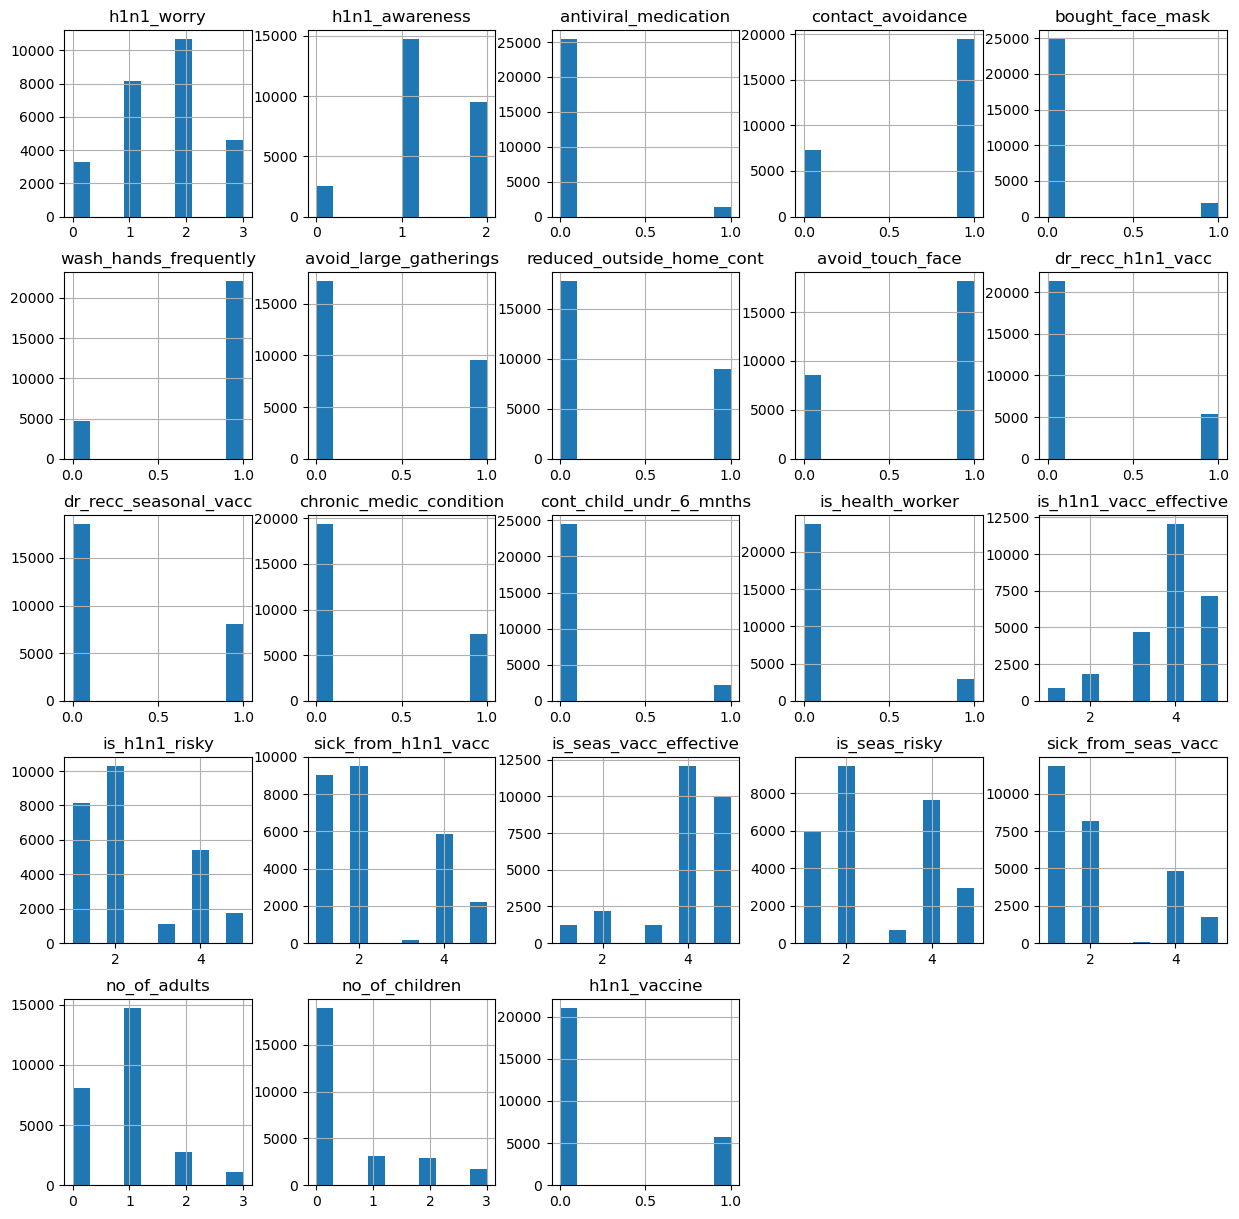

In [20]:
df.hist(figsize=(15,15))

<Axes: xlabel='age_bracket', ylabel='count'>

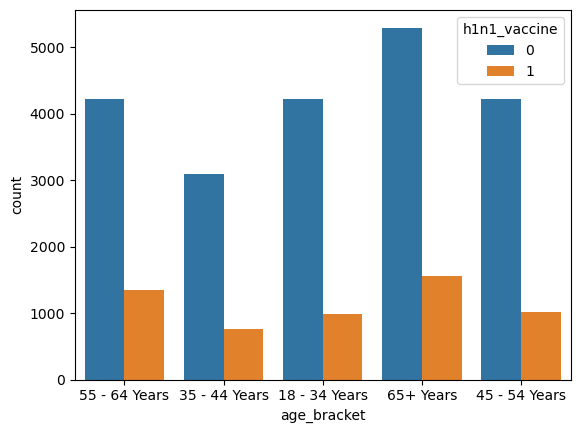

In [21]:
sns.countplot(x='age_bracket',hue='h1n1_vaccine',data=df)

<Axes: xlabel='census_msa', ylabel='count'>

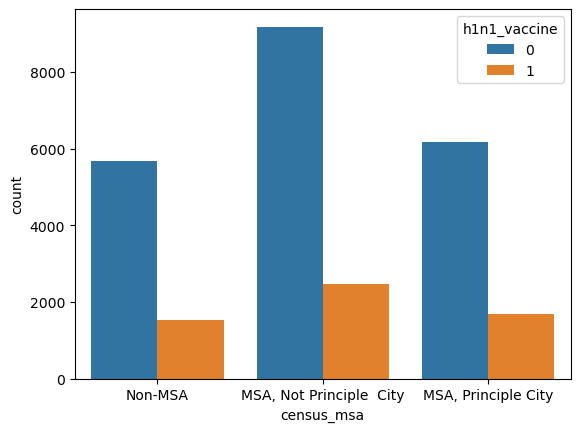

In [22]:
sns.countplot(x='census_msa',hue='h1n1_vaccine',data=df)

# Step6: Feature Selection

In [23]:
corr = df.corr()

In [24]:
corr

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
h1n1_worry,1.000000,0.060828,0.089866,0.229648,0.155757,0.291670,0.254133,0.245404,0.245038,0.136957,0.120670,0.092249,0.048400,0.032734,0.235841,0.372716,0.355637,0.231649,0.327986,0.222392,-0.016079,0.049441,0.121574
h1n1_awareness,0.060828,1.000000,-0.010450,0.087194,0.029888,0.089690,-0.047293,-0.066479,0.084633,0.094135,0.074376,-0.011653,0.025971,0.171516,0.119010,0.074394,-0.017038,0.085281,0.081156,-0.060241,0.023866,0.053378,0.117771
antiviral_medication,0.089866,-0.010450,1.000000,0.048533,0.145772,0.063996,0.106314,0.127204,0.069982,0.050882,0.031682,0.004637,0.026183,0.007145,0.030172,0.102553,0.076930,0.014498,0.081503,0.082177,0.044829,0.083090,0.040226
contact_avoidance,0.229648,0.087194,0.048533,1.000000,0.064155,0.334974,0.225402,0.217599,0.329796,0.065589,0.070761,0.042054,0.000952,0.002232,0.109066,0.116259,0.129983,0.117356,0.127991,0.081887,0.017995,0.038977,0.046837
bought_face_mask,0.155757,0.029888,0.145772,0.064155,1.000000,0.083229,0.180377,0.162964,0.103603,0.079887,0.065301,0.062200,0.036828,0.065645,0.037679,0.128316,0.104655,0.040889,0.105917,0.087917,0.014191,0.004794,0.070413
wash_hands_frequently,0.291670,0.089690,0.063996,0.334974,0.083229,1.000000,0.194750,0.191804,0.362979,0.086392,0.099317,0.030205,0.035749,0.052930,0.134815,0.167414,0.148739,0.136936,0.170655,0.087040,0.009367,0.047451,0.074570
avoid_large_gatherings,0.254133,-0.047293,0.106314,0.225402,0.180377,0.194750,1.000000,0.580881,0.251383,0.077143,0.087315,0.099621,0.020074,-0.032226,0.052432,0.125076,0.183517,0.078208,0.130800,0.133398,-0.030994,-0.009126,0.018089
reduced_outside_home_cont,0.245404,-0.066479,0.127204,0.217599,0.162964,0.191804,0.580881,1.000000,0.265401,0.067136,0.081252,0.093675,0.016657,-0.035128,0.050866,0.123348,0.171669,0.066861,0.117428,0.135835,-0.026542,-0.008937,0.022080
avoid_touch_face,0.245038,0.084633,0.069982,0.329796,0.103603,0.362979,0.251383,0.265401,1.000000,0.087201,0.099753,0.029966,0.026506,0.066284,0.101776,0.144442,0.130461,0.104530,0.141537,0.089016,-0.001233,0.023739,0.070855
dr_recc_h1n1_vacc,0.136957,0.094135,0.050882,0.065589,0.079887,0.086392,0.077143,0.067136,0.087201,1.000000,0.603152,0.152020,0.078306,0.098237,0.150546,0.247630,0.106671,0.103365,0.193956,0.054518,0.009081,0.029398,0.394086


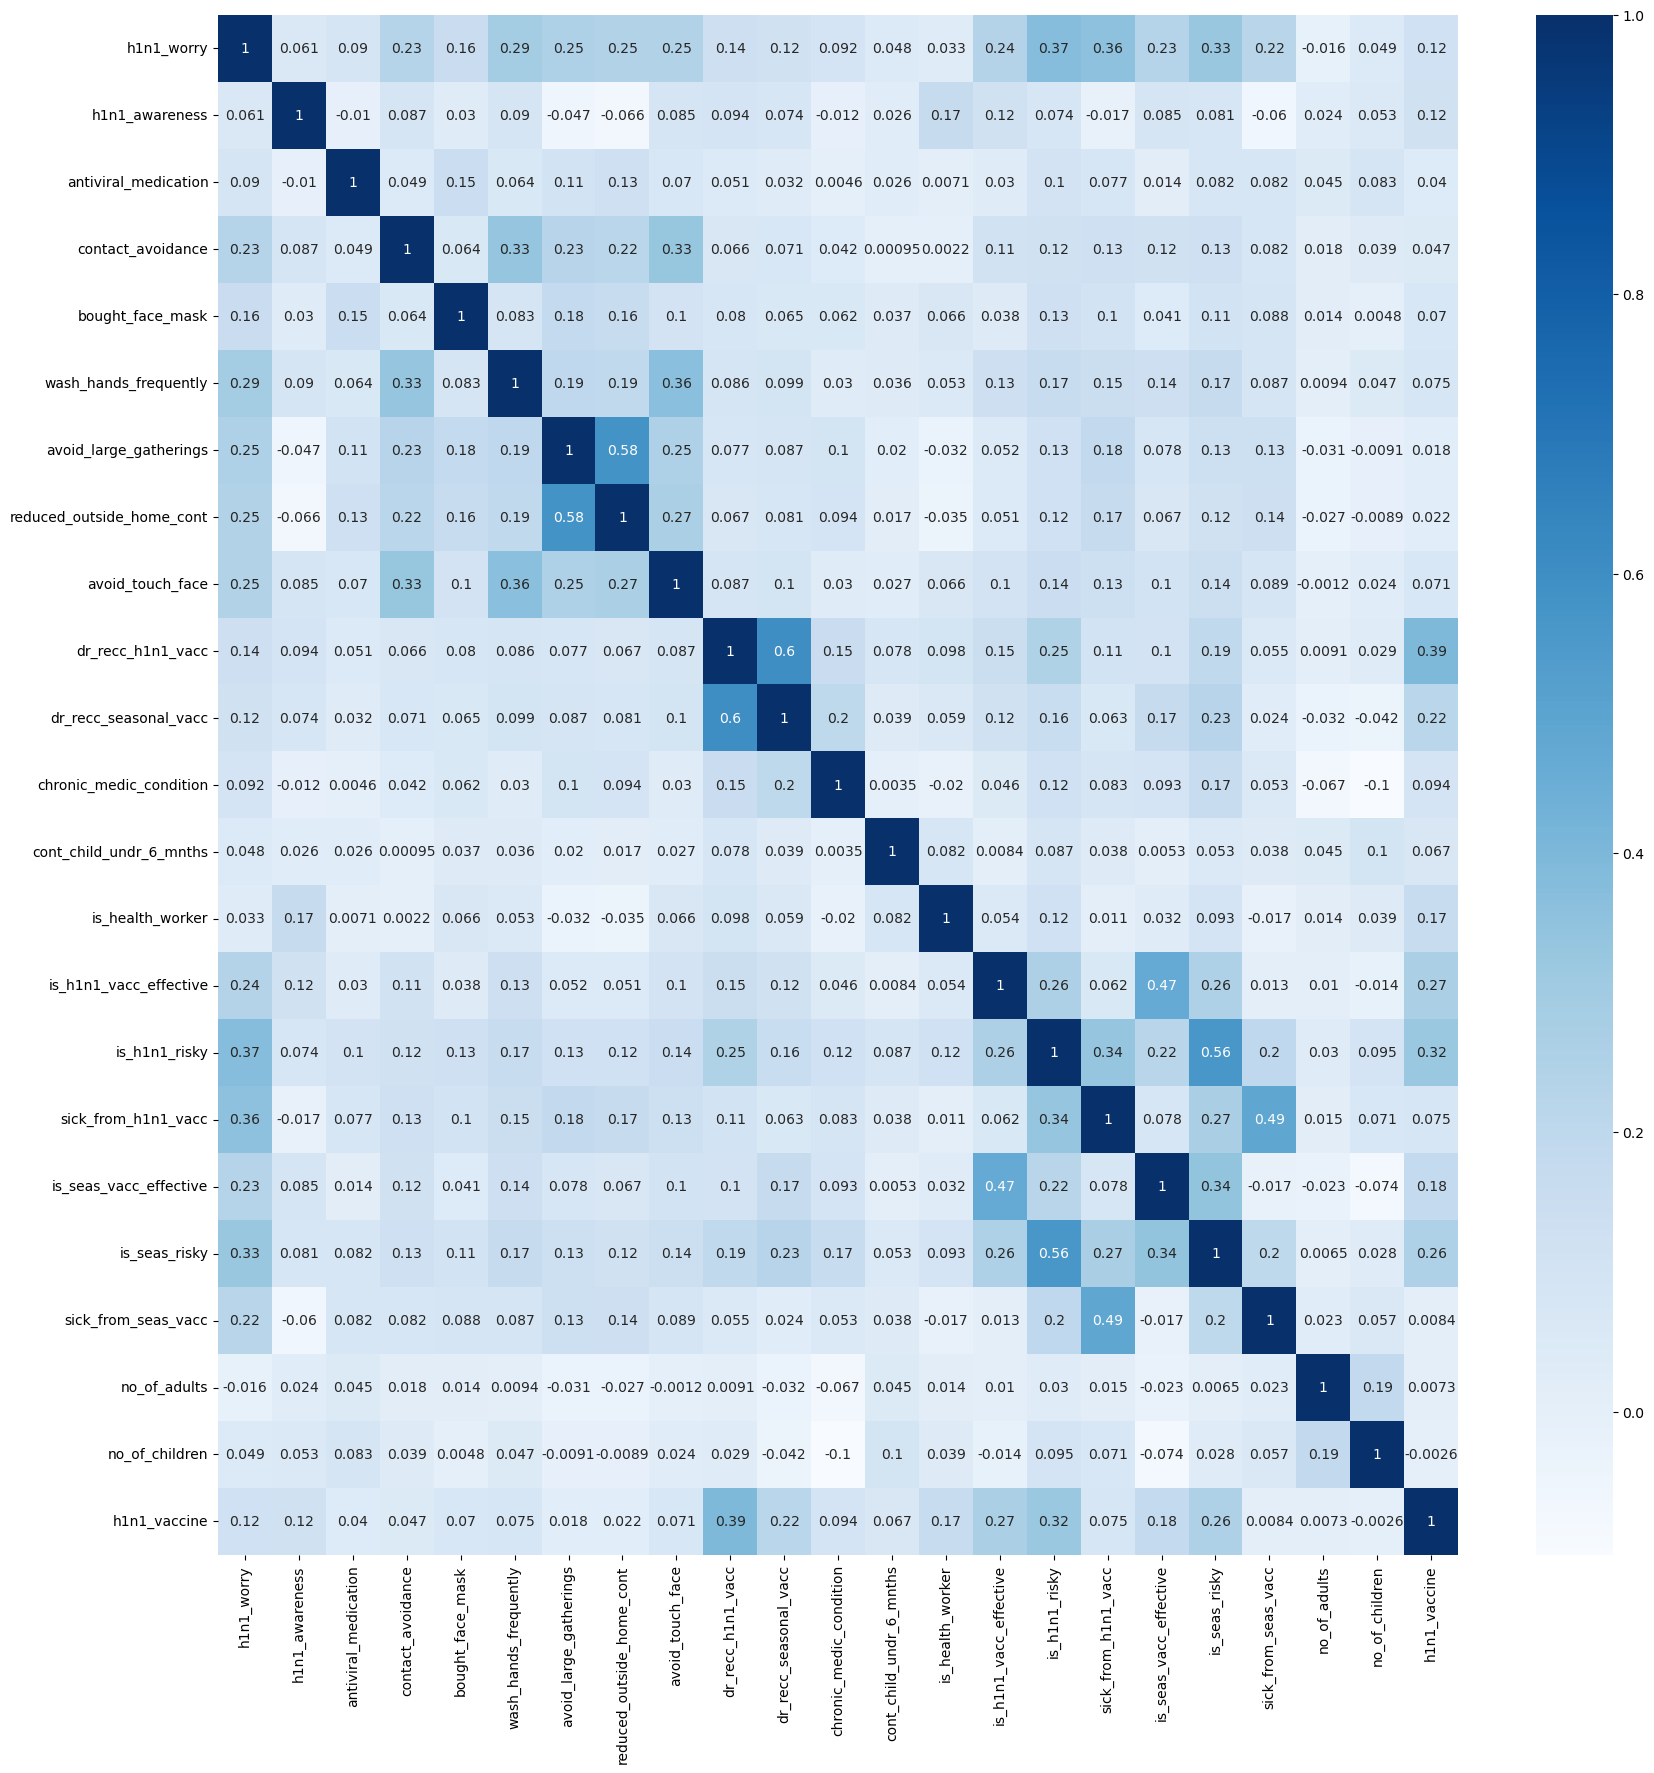

In [25]:
plt.figure(figsize=(20,20))
g=sns.heatmap(corr,annot=True,cmap="Blues")

# Step7: Split the Data Frame into X and y

In [26]:
### split data
Y = df['h1n1_vaccine']
X=df.drop(['h1n1_vaccine','age_bracket','census_msa'],axis=1)

In [27]:
# slpit into train and test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

# Step8: Classification Algorithms
- Logistic Regression
- Decision Tree
- Random Forest
- BaggingClassifier 
- AdaBoostClassifier
- GradientBoostingClassifier
- SVM

## 8.1 Logistic Regression

In [28]:
# fit the Linear Model
model1=LogisticRegression()

In [29]:
model1.fit(X_train,Y_train)

LogisticRegression()

In [30]:
model1.score(X_train,Y_train)

0.8357126140884624

In [31]:
model1.score(X_test,Y_test)

0.8230999625608386

In [32]:
predictions = model1.predict(X_test)

In [33]:
print(accuracy_score(Y_test,predictions))

0.8230999625608386


In [34]:
print("f1_score is:",f1_score(Y_test,predictions))
print("recall_score is:",recall_score(Y_test,predictions))
print("precision_score is:",precision_score(Y_test,predictions))

f1_score is: 0.49111470113085626
recall_score is: 0.38974358974358975
precision_score is: 0.6637554585152838


In [35]:
from sklearn import metrics
print(metrics.classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4172
           1       0.66      0.39      0.49      1170

    accuracy                           0.82      5342
   macro avg       0.76      0.67      0.69      5342
weighted avg       0.81      0.82      0.80      5342



In [36]:
confusion_matrix(Y_test,predictions)

array([[3941,  231],
       [ 714,  456]], dtype=int64)

<Axes: >

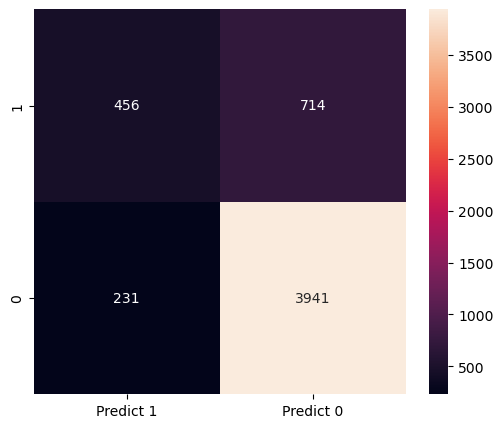

In [37]:
cm=metrics.confusion_matrix(Y_test,predictions,labels=[1,0])
df_cm = pd.DataFrame(cm, index=[i for i in['1','0']],
                    columns=[i for i in["Predict 1","Predict 0"]])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot =True , fmt='g')  

In [38]:
print(456+714+231+3941)
26707*0.2

5342


5341.400000000001

In [39]:
(456+3941)/5342

0.8230999625608386

## 8.2 Decision Tree

In [40]:
model2=DecisionTreeClassifier(max_depth=2,criterion='entropy')

In [41]:
model2.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [42]:
print(model2.score(X_train,Y_train))
print(model2.score(X_test,Y_test))

0.8212029019424292
0.8167353051291651


In [43]:
predictions = model2.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      4172
           1       0.71      0.27      0.39      1170

    accuracy                           0.82      5342
   macro avg       0.77      0.62      0.64      5342
weighted avg       0.80      0.82      0.78      5342



In [44]:
print("accuracy_score is:",accuracy_score(Y_test,predictions))
print("f1_score is:",f1_score(Y_test,predictions))
print("recall_score is:",recall_score(Y_test,predictions))
print("precision_score is:",precision_score(Y_test,predictions))

accuracy_score is: 0.8167353051291651
f1_score is: 0.3938080495356037
recall_score is: 0.2717948717948718
precision_score is: 0.7146067415730337


[[4045  127]
 [ 852  318]]


<Axes: >

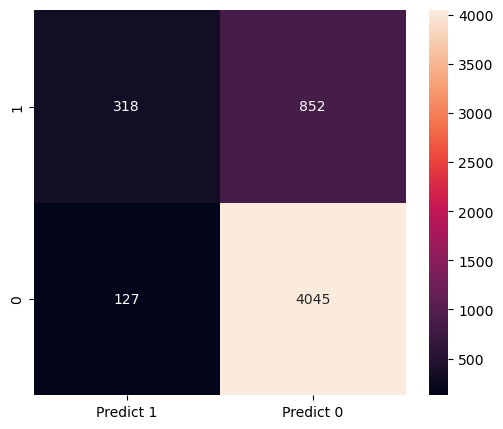

In [45]:
print(confusion_matrix(Y_test,predictions))
cm=metrics.confusion_matrix(Y_test,predictions,labels=[1,0])
df_cm = pd.DataFrame(cm, index=[i for i in['1','0']],
                    columns=[i for i in["Predict 1","Predict 0"]])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot =True , fmt='g')  

In [46]:
print(318+852+127+4045)
26707*0.2

5342


5341.400000000001

In [47]:
(318+4045)/5342

0.8167353051291651

## 8.3 Random Forest

In [48]:
model3=RandomForestClassifier(criterion='entropy',max_depth=7)

In [49]:
model3.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=7)

In [50]:
print(model3.score(X_train,Y_train))
print(model3.score(X_test,Y_test))

0.8405335829627896
0.8257207038562336


In [51]:
predictions = model3.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4172
           1       0.72      0.34      0.46      1170

    accuracy                           0.83      5342
   macro avg       0.78      0.65      0.68      5342
weighted avg       0.81      0.83      0.80      5342



In [52]:
print("accuracy_score is:",accuracy_score(Y_test,predictions))
print("f1_score is:",f1_score(Y_test,predictions))
print("recall_score is:",recall_score(Y_test,predictions))
print("precision_score is:",precision_score(Y_test,predictions))

accuracy_score is: 0.8257207038562336
f1_score is: 0.45777518928363425
recall_score is: 0.33589743589743587
precision_score is: 0.7184643510054844


[[4018  154]
 [ 777  393]]


<Axes: >

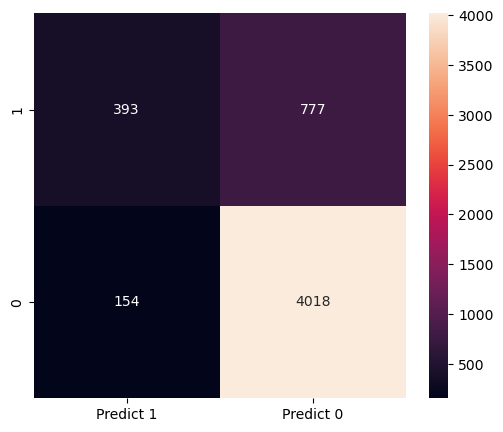

In [53]:
print(confusion_matrix(Y_test,predictions))
cm=metrics.confusion_matrix(Y_test,predictions,labels=[1,0])
df_cm = pd.DataFrame(cm, index=[i for i in['1','0']],
                    columns=[i for i in["Predict 1","Predict 0"]])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot =True , fmt='g') 

In [54]:
print(401+769+153+4019)
27607*0.2

5342


5521.400000000001

In [55]:
(401+4019)/5342

0.8274054661175589

## 8.4 BaggingClassifier

In [56]:
model4=BaggingClassifier(max_features=8,random_state=15)

In [57]:
model4.fit(X_train,Y_train)

BaggingClassifier(max_features=8, random_state=15)

In [58]:
print(model4.score(X_train,Y_train))
print(model4.score(X_test,Y_test))

0.8327638661362041
0.8011980531636091


In [59]:
predictions = model4.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89      4172
           1       0.76      0.13      0.23      1170

    accuracy                           0.80      5342
   macro avg       0.78      0.56      0.56      5342
weighted avg       0.79      0.80      0.74      5342



In [60]:
print("accuracy_score is:",accuracy_score(Y_test,predictions))
print("f1_score is:",f1_score(Y_test,predictions))
print("recall_score is:",recall_score(Y_test,predictions))
print("precision_score is:",precision_score(Y_test,predictions))

accuracy_score is: 0.8011980531636091
f1_score is: 0.22707423580786024
recall_score is: 0.13333333333333333
precision_score is: 0.7647058823529411


[[4124   48]
 [1014  156]]


<Axes: >

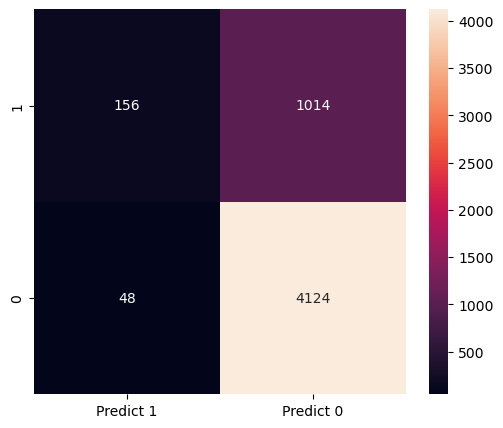

In [61]:
print(confusion_matrix(Y_test,predictions))
cm=metrics.confusion_matrix(Y_test,predictions,labels=[1,0])
df_cm = pd.DataFrame(cm, index=[i for i in['1','0']],
                    columns=[i for i in["Predict 1","Predict 0"]])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot =True , fmt='g')  

In [62]:
print(156+1014+48+4124)
26707*0.2

5342


5341.400000000001

In [63]:
(156+4124)/5324

0.8039068369646882

## 8.5 AdaBoostClassifier

In [64]:
model5=AdaBoostClassifier()

In [65]:
model5.fit(X_train,Y_train)

AdaBoostClassifier()

In [66]:
print(model5.score(X_train,Y_train))
print(model5.score(X_test,Y_test))

0.8357126140884624
0.8257207038562336


In [67]:
predictions = model5.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89      4172
           1       0.68      0.39      0.50      1170

    accuracy                           0.83      5342
   macro avg       0.76      0.67      0.70      5342
weighted avg       0.81      0.83      0.81      5342



In [68]:
print("accuracy_score is:",accuracy_score(Y_test,predictions))
print("f1_score is:",f1_score(Y_test,predictions))
print("recall_score is:",recall_score(Y_test,predictions))
print("precision_score is:",precision_score(Y_test,predictions))

accuracy_score is: 0.8257207038562336
f1_score is: 0.49593936112615056
recall_score is: 0.39145299145299145
precision_score is: 0.6765140324963073


[[3953  219]
 [ 712  458]]


<Axes: >

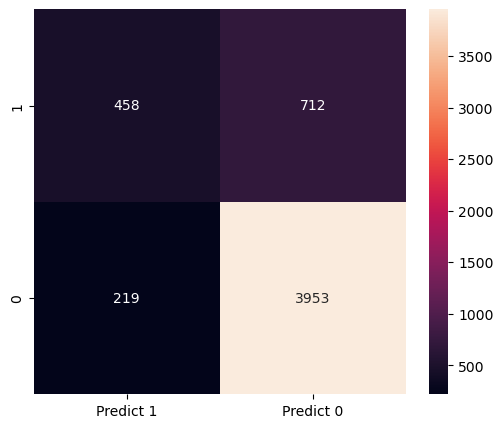

In [69]:
print(confusion_matrix(Y_test,predictions))
cm=metrics.confusion_matrix(Y_test,predictions,labels=[1,0])
df_cm = pd.DataFrame(cm, index=[i for i in['1','0']],
                    columns=[i for i in["Predict 1","Predict 0"]])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot =True , fmt='g')

In [70]:
print(458+712+219+3953)
26707*0.2

5342


5341.400000000001

In [71]:
(458+3953)/5342

0.8257207038562336

## 8.6 GradientBoostingClassifier

In [72]:
model6=GradientBoostingClassifier(n_estimators=20)

In [73]:
model6.fit(X_train,Y_train)

GradientBoostingClassifier(n_estimators=20)

In [74]:
print(model6.score(X_train,Y_train))
print(model6.score(X_test,Y_test))

0.8352913643809969
0.8253463122426058


In [75]:
predictions = model6.predict(X_test)
print(metrics.classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4172
           1       0.70      0.36      0.47      1170

    accuracy                           0.83      5342
   macro avg       0.77      0.66      0.68      5342
weighted avg       0.81      0.83      0.80      5342



In [76]:
print("accuracy_score is:",accuracy_score(Y_test,predictions))
print("f1_score is:",f1_score(Y_test,predictions))
print("recall_score is:",recall_score(Y_test,predictions))
print("precision_score is:",precision_score(Y_test,predictions))

accuracy_score is: 0.8253463122426058
f1_score is: 0.4737732656514383
recall_score is: 0.358974358974359
precision_score is: 0.6965174129353234


[[3989  183]
 [ 750  420]]


<Axes: >

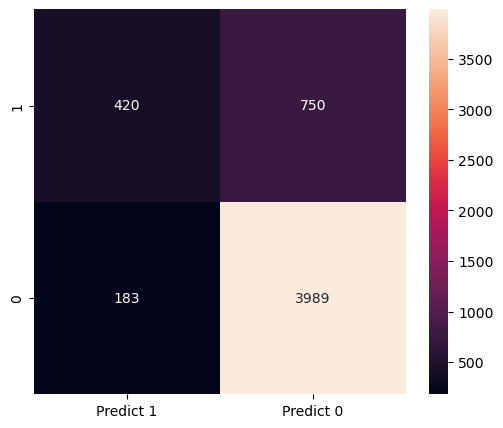

In [77]:
print(confusion_matrix(Y_test,predictions))
cm=metrics.confusion_matrix(Y_test,predictions,labels=[1,0])
df_cm = pd.DataFrame(cm, index=[i for i in['1','0']],
                    columns=[i for i in["Predict 1","Predict 0"]])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot =True , fmt='g')

In [78]:
420+750+183+3989

5342

In [79]:
26707*0.2

5341.400000000001

In [80]:
420+3989

4409

In [81]:
4409/5342

0.8253463122426058

## 8.7 SVM

In [82]:
model7=SVC()

In [83]:
model7.fit(X_train,Y_train)

SVC()

In [84]:
print(model7.score(X_train,Y_train))
print(model7.score(X_test,Y_test))

0.8345424760121695
0.8270310745039311


In [85]:
predictions = model7.predict(X_test)
print(metrics.classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4172
           1       0.69      0.38      0.49      1170

    accuracy                           0.83      5342
   macro avg       0.77      0.67      0.69      5342
weighted avg       0.81      0.83      0.81      5342



In [86]:
print("accuracy_score is:",accuracy_score(Y_test,predictions))
print("f1_score is:",f1_score(Y_test,predictions))
print("recall_score is:",recall_score(Y_test,predictions))
print("precision_score is:",precision_score(Y_test,predictions))

accuracy_score is: 0.8270310745039311
f1_score is: 0.48893805309734506
recall_score is: 0.37777777777777777
precision_score is: 0.6927899686520376


[[3976  196]
 [ 728  442]]


<Axes: >

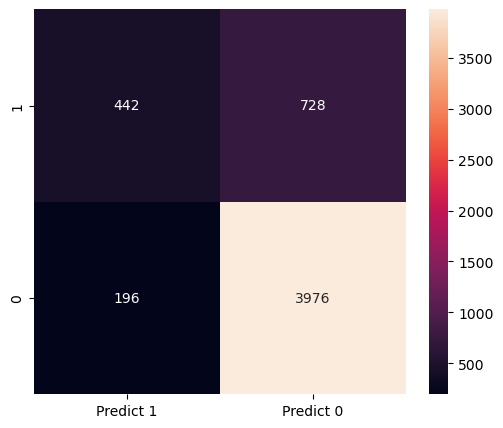

In [87]:
print(confusion_matrix(Y_test,predictions))
cm=metrics.confusion_matrix(Y_test,predictions,labels=[1,0])
df_cm = pd.DataFrame(cm, index=[i for i in['1','0']],
                    columns=[i for i in["Predict 1","Predict 0"]])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot =True , fmt='g')

In [88]:
print(442+728+196+3976)
26707*0.2

5342


5341.400000000001

In [89]:
(442+3976)/5342

0.8270310745039311